# Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Import data bases

In [2]:
df = pd.read_csv('../data/base_modelis_pass_det.csv',sep = ';')

In [3]:
df.shape

(329064, 90)

## analyse des types de var

In [4]:
df.select_dtypes(include = 'object').shape[1]

20

In [5]:
df.select_dtypes(include = 'float').shape[1]

44

In [6]:
df.select_dtypes(include = 'int').shape[1]

26

# Valeurs manquantes

In [7]:
df_temp = df.drop_duplicates(subset = 'cd_op', keep = 'last')

In [8]:
df_temp.shape

(23305, 90)

In [9]:
df_temp.isna().sum()/df_temp.shape[0]>0.4

cd_op                 False
date_entree_defaut    False
date_sortie_defaut     True
arrete                False
fl_pass_DET           False
                      ...  
PTG                   False
AGE_EMP1              False
AGE_EMP2               True
TX_ENDET              False
MT_REST_VIVRE         False
Length: 90, dtype: bool

# To do list

Analyse exploratoire : distrib var quali/quanti, visualisation NaN, corrélations, doublons, outliers

Analyse + profonde : que prédire, quelles vars sont pertinentes, diff entre les 2 df, liste questions à poser

Axel : distrib quanti, correlations, outliers

Baheux : distrib quali ,NaN , doublons

### Interrogations :
Faut-il ne garder que la dernière ligne de chaque individu, correspondant à sa sortie de defaut ou bien à son DET pour faire un logit? Ou bien doit on garder toutes les observations au risque d'avoir trop peu de 0 et donc de moins bien classifier?

Penser au problème de troncature/censure des données (faut il supprimer les individus dont le dossier est encore en cours?)

### Conversion des dates en datetime

In [10]:
df['date_entree_defaut'] = pd.to_datetime(df['date_entree_defaut'])

df['date_sortie_defaut'] = pd.to_datetime(df['date_sortie_defaut'])

df['arrete'] = pd.to_datetime(df['arrete'])

df['dt_arr_last_enc_ope'] = pd.to_datetime(df['dt_arr_last_enc_ope'])
df['dt_arr_1st_enc_ope'] = pd.to_datetime(df['dt_arr_1st_enc_ope'])

df['DT_MEP_OPE'] = pd.to_datetime(df['DT_MEP_OPE'], format='%d%b%Y:%H:%M:%S.%f')


df['dtHJD_prov'] = pd.to_datetime(df['dtHJD_prov'])
df['dtHJD_def'] = pd.to_datetime(df['dtHJD_def'])

df['date_sortie_defaut'] = pd.to_datetime(df['date_sortie_defaut'])

C:\Users\baheu\AppData\Local\Temp\ipykernel_15484\637034505.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_entree_defaut'] = pd.to_datetime(df['date_entree_defaut'])
C:\Users\baheu\AppData\Local\Temp\ipykernel_15484\637034505.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_sortie_defaut'] = pd.to_datetime(df['date_sortie_defaut'])
C:\Users\baheu\AppData\Local\Temp\ipykernel_15484\637034505.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['arrete'] = pd.to_datetime(df['arrete'])
C:\Users\baheu\AppData\Local\Temp\ipykernel_15484\637034505.py:7

# Analyse préliminaire

In [20]:
df_obj = df.drop_duplicates(subset = 'cd_op',keep = 'last').drop(columns = ['CD_NAT_EMP2']).select_dtypes(include='object').drop(columns = 'cd_op').copy()

In [21]:
for col in df_obj.columns:
    print(f"{col} : {df_obj[col].nunique()}")

CD_NAT_EMP1 : 5
CD_DEST_PFI : 7
CD_NATUR_OP_PFI : 18
CD_CSP_EMP1 : 16
CD_CSP_EMP2 : 17
CD_SITFAM_EMP1 : 7
CD_SITFAM_EMP2 : 8
sol_echec : 4
CD_MTF_DFC : 20
regroup_natur_op : 4


In [13]:
df.drop_duplicates(subset = 'cd_op', keep = 'last')['fl_pass_DET'].value_counts()

fl_pass_DET
0    15842
1     7463
Name: count, dtype: int64

In [14]:
df.head(50)

,cd_op,date_entree_defaut,date_sortie_defaut,arrete,fl_pass_DET,nb_prt,DT_MEP_OPE,CD_NAT_EMP1,CD_NAT_EMP2,ANC_BANC_MAX_PFI,...,EAD_1an_avant_def,LTVnonactu_1an_avant_def,dls_ges_def,AMI,EXE,PTG,AGE_EMP1,AGE_EMP2,TX_ENDET,MT_REST_VIVRE
0,I860708600,2017-01-16,NaT,2017-01-31,0,1,1986-09-15,NaN,NaN,NaN,...,1121.38,NaN,0,NaN,NaN,NaN,74,78.0,NaN,NaN
1,I860708600,2017-01-16,NaT,2017-02-28,0,1,1986-09-15,NaN,NaN,NaN,...,1121.38,NaN,1,NaN,NaN,NaN,75,78.0,NaN,NaN
2,I860708600,2017-01-16,NaT,2017-03-31,0,1,1986-09-15,NaN,NaN,NaN,...,1121.38,NaN,2,NaN,NaN,NaN,75,78.0,NaN,NaN
3,I860708600,2017-01-16,NaT,2017-04-30,0,1,1986-09-15,NaN,NaN,NaN,...,1121.38,NaN,3,NaN,NaN,NaN,75,78.0,NaN,NaN
4,I860708600,2017-01-16,NaT,2017-05-31,0,1,1986-09-15,NaN,NaN,NaN,...,1121.38,NaN,4,NaN,NaN,NaN,75,78.0,NaN,NaN
5,I860708600,2017-01-16,NaT,2017-06-30,0,1,1986-09-15,NaN,NaN,NaN,...,1121.38,NaN,5,NaN,NaN,NaN,75,78.0,NaN,NaN
6,I860708600,2017-01-16,NaT,2017-07-31,0,1,1986-09-15,NaN,NaN,NaN,...,1121.38,NaN,6,NaN,NaN,NaN,75,79.0,NaN,NaN
7,I860708600,2017-01-16,NaT,2017-08-31,0,1,1986-09-15,NaN,NaN,NaN,...,1121.38,NaN,7,NaN,NaN,NaN,75,79.0,NaN,NaN
8,I860708600,2017-01-16,NaT,2017-09-30,0,1,1986-09-15,NaN,NaN,NaN,...,1121.38,NaN,8,NaN,NaN,NaN,75,79.0,NaN,NaN
9,I860708600,2017-01-16,NaT,2017-10-31,0,1,1986-09-15,NaN,NaN,NaN,...,1121.38,NaN,9,NaN,NaN,NaN,75,79.0,NaN,NaN


- On a 23 305 individus sur l'ensemble de la période
- 7463 d'entre eux sont passés en DET
- Le reste a remboursé le défaut


# Analyse var quali sur dataframe total

In [22]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Définir le nombre de graphiques par ligne
graphs_per_row = 3

# Calculer le nombre total de lignes nécessaires
num_rows = -(-len(df_obj.columns) // graphs_per_row)  # Utilise la division entière vers le haut

# Créer une grille de sous-graphiques
fig = make_subplots(rows=num_rows, cols=graphs_per_row, subplot_titles=df_obj.columns)

for i, col in enumerate(df_obj.columns):
    category_counts = df_obj[col].value_counts().reset_index()
    category_counts.columns = ['Catégorie', 'Fréquence']

    # Création du diagramme à barres avec Plotly Express
    bar_fig = px.bar(category_counts, x='Catégorie', y='Fréquence', title=col,
                     labels={'Catégorie': 'Catégorie', 'Fréquence': 'Fréquence'})

    # Ajout du graphique à la grille
    row = i // graphs_per_row + 1
    col = i % graphs_per_row + 1
    fig.add_trace(bar_fig.data[0], row=row, col=col)

# Mettre à jour la mise en page
fig.update_layout(height=num_rows * 200, width=graphs_per_row * 400, title_text="Graphiques par colonne")
fig.show()


# Distributions des var quanti

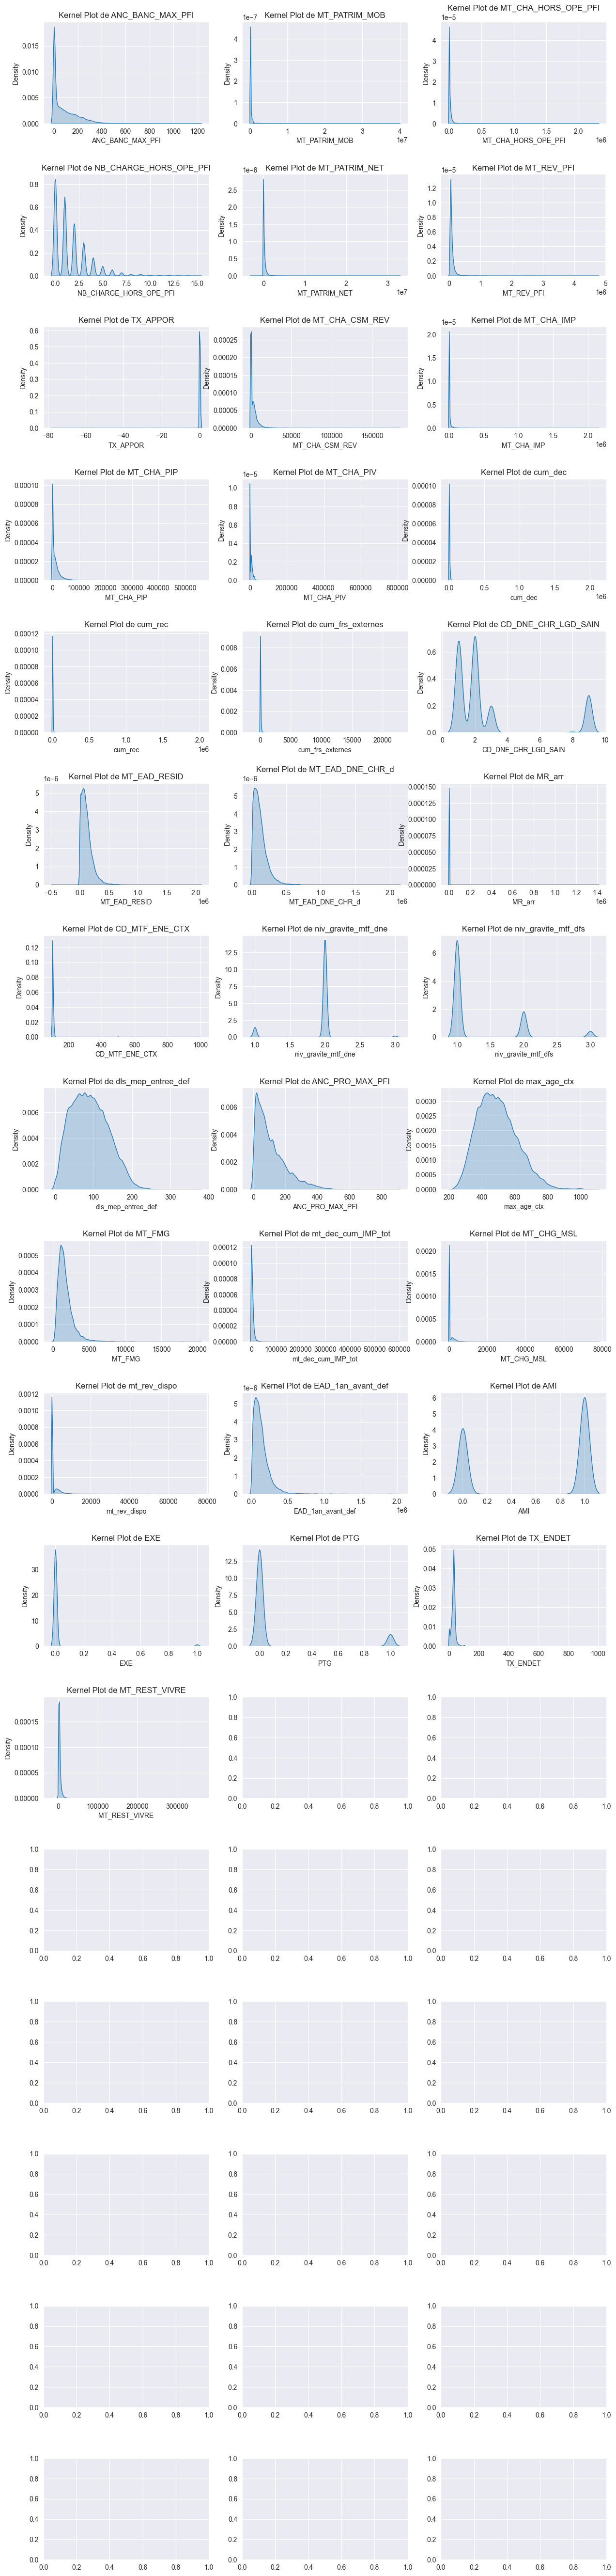

In [16]:
from plotly.subplots import make_subplots

# Définir le nombre de graphiques par ligne
graphs_per_row = 3

df_num = df.drop(columns = ['NB_RP_HOP', 'mt_inscrip_devant_CL_afr', 'valeur_bien_afr',
'CD_CSP_EMP2', 'LTV_actu', 'NB_LO_HOP', 
'LTVnonactu_1an_avant_def', 'NB_RS_HOP',
'dispo_HP_afr', 'CD_NAT_EMP2', 'dtHJD_prov',
'dtHJD_def', 'dtSRT1st', 'AGE_EMP2', 'CD_SITFAM_EMP2'])
float_columns = df_num.select_dtypes(include='float').columns

num_cols = 3
num_rows = (len(float_columns) + 1) // 2  # Ajoutez 1 pour gérer les cas impairs

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(float_columns):
    sns.kdeplot(x=df[col], ax=axes[i], fill=True)
    axes[i].set_title(f'Kernel Plot de {col}')

plt.show()

# Stabilité des catégories dans le tps par rapport à la target 

In [26]:
df

Index(['cd_op', 'date_entree_defaut', 'date_sortie_defaut', 'arrete',
       'fl_pass_DET', 'nb_prt', 'DT_MEP_OPE', 'CD_NAT_EMP1', 'CD_NAT_EMP2',
       'ANC_BANC_MAX_PFI', 'CD_DEST_PFI', 'CD_NATUR_OP_PFI',
       'CD_POST_BIEN_PFI', 'MT_PATRIM_MOB', 'MT_CHA_HORS_OPE_PFI',
       'NB_CHARGE_HORS_OPE_PFI', 'MT_PATRIM_NET', 'MT_REV_PFI',
       'FL_REL_NON_ANNULE', 'NB_DUR_PFI', 'TX_APPOR', 'MT_CHA_CSM_REV',
       'MT_CHA_IMP', 'MT_CHA_PIP', 'MT_CHA_PIV', 'FL_ETR', 'CD_ETAT_CIVIL',
       'CD_CSP_EMP1', 'CD_CSP_EMP2', 'CD_SITFAM_EMP1', 'CD_SITFAM_EMP2',
       'NB_RP_HOP', 'NB_RS_HOP', 'NB_LO_HOP', 'cum_dec', 'cum_rec',
       'cum_frs_externes', 'CD_DNE_CHR_LGD_SAIN', 'MT_EAD_RESID',
       'MT_EAD_DNE_CHR_d', 'fl_prise_de_gar', 'fl_fam_vam', 'fam_ETH',
       'fam_ENQ', 'fam_exp', 'fam_hyp', 'fam_sim', 'fam_AEP', 'dat_dec_echec',
       'solution', 'fam_PCD', 'sol_echec', 'dtSRT1st', 'dtHJD_def',
       'dtHJD_prov', 'MR_arr', 'CD_MTF_ENE_CTX', 'niv_gravite_mtf_dne',
       'CD_MTF_DF

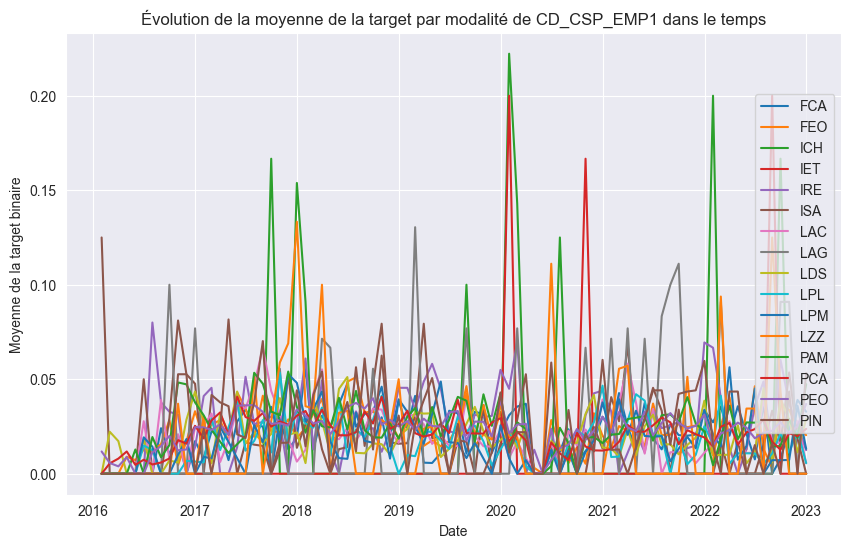

In [39]:
import matplotlib.pyplot as plt

for col in df[['CD_CSP_EMP1']].columns:#.select_dtypes(include = 'object').columns:
    # Calcul de la moyenne par groupe (genre et date)
    result = df.groupby([col, 'arrete'])['fl_pass_DET'].mean().reset_index()
    
    # Tracé des données
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for genre, group in result.groupby(f'{col}'):
        ax.plot(group['arrete'], group['fl_pass_DET'], label=f'{genre}')
    
    # Ajout de légendes et labels
    ax.legend(loc = 'right')
    ax.set_xlabel('Date')
    ax.set_ylabel('Moyenne de la target binaire')
    ax.set_title(f'Évolution de la moyenne de la target par modalité de {col} dans le temps')
    
    # Affichage du graphique
    plt.show()


### Dates

In [ ]:
df.select_dtypes(include='datetime').columns

In [ ]:
for col in df.select_dtypes(include = 'datetime').columns:
    fig = px.histogram(df[col], title=col,
                 labels={'Catégorie': 'Catégorie', 'Fréquence': 'Fréquence'})

    # Affichage du diagramme
    fig.show()

# Analyse dépendances temporelles

In [30]:
var_to_categorize = [
    "fl_pass_DET",
    "CD_POST_BIEN_PFI",
    "FL_REL_NON_ANNULE",
    "FL_ETR",
    "CD_ETAT_CIVIL",
    "CD_DNE_CHR_LGD_SAIN",
    "fl_prise_de_gar",
    "fl_fam_vam",
    "fam_ETH",
    "fam_ENQ",
    "fam_exp",
    "fam_hyp",
    "fam_sim",
    "fam_AEP",
    "dat_dec_echec",
    "solution",
    "fam_PCD",
    "CD_MTF_ENE_CTX",
    "niv_gravite_mtf_dne",
    "niv_gravite_mtf_dfs",
    "no_pass_def",
    "fl_def_ss_pass_CTX",
    "fl_prt_Conso",
    "fl_fonc",
    "AMI",
    "EXE",
    "PTG"
]

for var in var_to_categorize : 
    df[var] = df[var].astype("object")

In [31]:
liste= []
for col in df.select_dtypes(include = 'number').columns:
    if df[col].nunique()>20:
        liste.append(col)

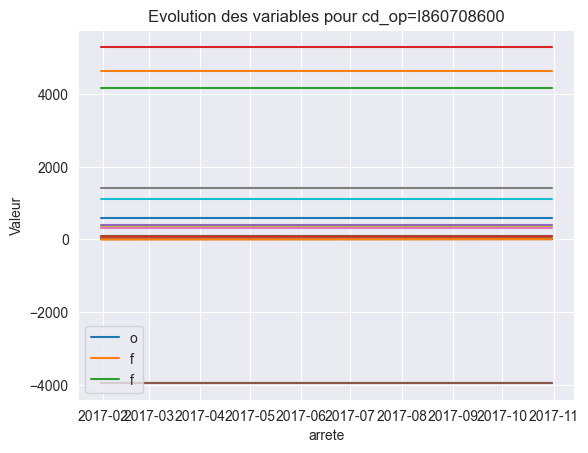

In [32]:
import matplotlib.pyplot as plt

grouped_df = df.iloc[:10,:].groupby('cd_op')

for cd_op, group in grouped_df:
    
    plt.figure()
    
    for col in group[liste].columns:
        plt.plot(group['arrete'], group[col], label=col)
    
    plt.xlabel('arrete')
    plt.ylabel('Valeur')
    plt.title(f'Evolution des variables pour cd_op={cd_op}')
    plt.legend('off')
    
    plt.show()

# Feature engineering 
### CD_CSP_EMP1

In [ ]:
df = df.drop_duplicates(subset = 'cd_op',keep = 'last')
df.shape

In [85]:
precaire = ['IET' , 'LPM']
# Ajouter une colonne 'Groupe' au DataFrame en fonction des catégories
df['CSP'] = np.where(df['CD_CSP_EMP1'].isin(precaire), 'CSP ayant une faible proportion de DET', 'CSP ayant une haute proportion de DET')


In [53]:
# Définir les catégories de regroupement
categories_aisés = ['IET' , 'LPM']
categories_moyens = ['PEO']  
categories_pauvres = ['ICH', 'IET', 'ISA', 'LAC', 'LAG', 'PIN','FEO', 'LZZ', 'PAM', 'PCA','FCA', 'FIN', 'IRE', 'LDS', 'LPL']

# Ajouter une colonne 'Catégorie' au DataFrame en fonction des catégories
df['Catégorie'] = np.select(
    [
        df['CD_CSP_EMP1'].isin(categories_aisés),
        df['CD_CSP_EMP1'].isin(categories_moyens),
        df['CD_CSP_EMP1'].isin(categories_pauvres)
    ],
    ['Aisés', 'Moyens', 'Pauvres'],
    default='Autre'
)

(23305, 92)

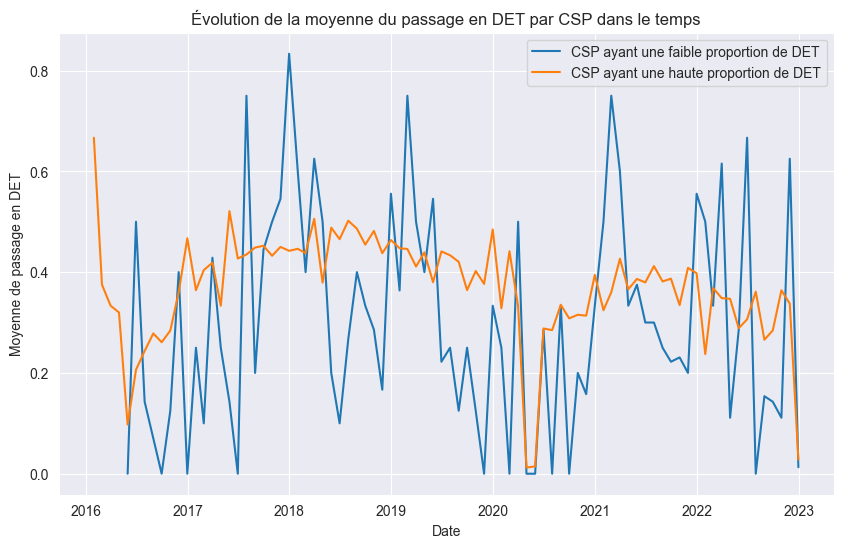

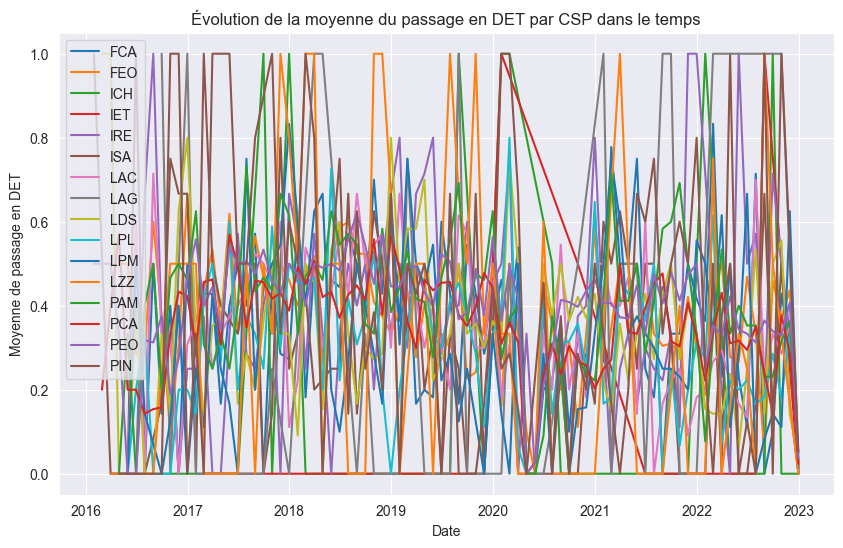

In [89]:
import matplotlib.pyplot as plt

for col in df[['CSP','CD_CSP_EMP1']].columns:#.select_dtypes(include = 'object').columns:
    
    result = df.groupby([col, 'arrete'])['fl_pass_DET'].mean().reset_index()
   
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for genre, group in result.groupby(f'{col}'):
        ax.plot(group['arrete'], group['fl_pass_DET'], label=f'{genre}')
    
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Moyenne de passage en DET')
    ax.set_title(f'Évolution de la moyenne du passage en DET par CSP dans le temps')
 
    plt.show()


In [79]:
list_mean = []
for cat in df['CD_CSP_EMP1'].unique():
    moyenne = df[df['CD_CSP_EMP1']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
CSP = pd.DataFrame(list_mean)
CSP['CSP'] = df['CD_CSP_EMP1'].unique()
CSP

,0,CSP
0,0.292958,ISA
1,0.350590,PEO
2,0.308180,PCA
3,0.321584,FEO
4,0.317661,FCA
5,0.290909,LDS
6,0.349575,PAM
7,0.290441,LAC
8,0.251682,LPM
9,0.266541,LPL


### CD_MTF_DFC


In [94]:
list_mean = []
for cat in df['CD_MTF_DFC'].unique():
    moyenne = df[df['CD_MTF_DFC']==cat]['fl_pass_DET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean)
motif['Motif defaut'] = df['CD_MTF_DFC'].unique()
motif

,0,Motif defaut
0,0.423913,SEP
1,0.444867,SUR
2,0.295699,BDF
3,0.016466,YYY
4,0.488673,MOR
5,0.291375,AUT
6,0.574511,DEC
7,0.326227,DI1
8,NaN,NaN
9,0.440252,RIS


In [108]:
motif_tres_mauvais = ['ESC' , 'REL', 'ORG', 'PPE', 'DEC', 'SIN']
motif_mauvais = ['MOR', 'CHO', 'DIV', 'SUR', 'RIS', 'SEP', 'SAN', 'CON', 'DI1' ]  
motif_moyen = ['BDF', 'AUT', 'PCL', 'PCT', 'YYY']

# Ajouter une colonne 'Catégorie' au DataFrame en fonction des catégories
df['Motif'] = np.select(
    [
        df['CD_MTF_DFC'].isin(motif_tres_mauvais),
        df['CD_MTF_DFC'].isin(motif_mauvais),
        df['CD_MTF_DFC'].isin(motif_moyen)
    ],
    ['Motif tres mauvais', 'Motif mauvais', 'Motif moyen'],
    default='Motif moyen')

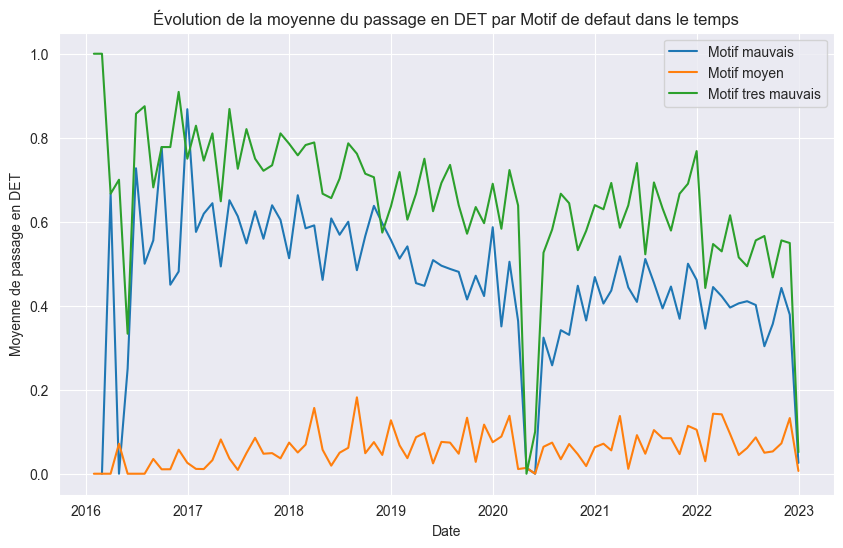

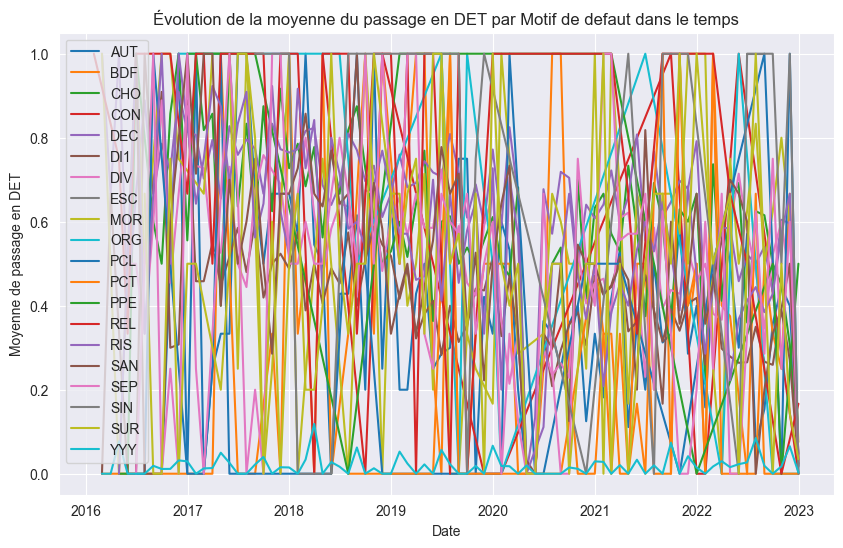

In [109]:
import matplotlib.pyplot as plt

for col in df[['Motif','CD_MTF_DFC']].columns:#.select_dtypes(include = 'object').columns:
    
    result = df.groupby([col, 'arrete'])['fl_pass_DET'].mean().reset_index()
   
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for genre, group in result.groupby(f'{col}'):
        ax.plot(group['arrete'], group['fl_pass_DET'], label=f'{genre}')
    
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Moyenne de passage en DET')
    ax.set_title(f'Évolution de la moyenne du passage en DET par Motif de defaut dans le temps')
 
    plt.show()


In [103]:
# Supposons que 'Motif' soit le nom de la colonne contenant les catégories
category_counts = df['Motif'].value_counts().reset_index()
category_counts.columns = ['Catégorie', 'Fréquence']

# Création du diagramme à barres avec Plotly Express
bar_fig = px.bar(category_counts, x='Catégorie', y='Fréquence', title='Vérification des effectifs par nouvelles modalités',
                 labels={'Catégorie': 'Catégorie', 'Fréquence': 'Fréquence'})

bar_fig.show()  # Correction : Utilisation de la méthode show() pour afficher la figure
